In [1]:
from google.colab import drive
drive.mount('./mydrive')

Mounted at ./mydrive


In [2]:
pwd

'/content'

In [3]:
cd mydrive/

/content/mydrive


In [4]:
ls

MyDrive/


In [5]:
cd MyDrive

/content/mydrive/MyDrive


In [6]:
cd colab

/content/mydrive/MyDrive/colab


In [7]:
cd deeplearning

/content/mydrive/MyDrive/colab/deeplearning


In [8]:
ls

brainimages/        cifar10.ipynb        googLeNet.ipynb  Untitled0.ipynb
brain_images.ipynb  fashion_mnist.ipynb  mnist_cnn.ipynb


In [9]:
cd brainimages

/content/mydrive/MyDrive/colab/deeplearning/brainimages


In [10]:
ls

brainimages/


In [11]:
ls

brainimages/


In [12]:
pwd

'/content/mydrive/MyDrive/colab/deeplearning/brainimages'

In [16]:
import os

In [17]:
import PIL.Image as pilmg
import numpy as np

In [20]:
img = pilmg.open('/content/mydrive/MyDrive/colab/deeplearning/brainimages/brainimages/train/normal/normal_train_10.jpg')
img_arr = np.array(img)
img_arr.shape


(150, 150, 3)

In [21]:
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip =True,
                                   width_shift_range=0.1,
                                   height_shift_range = 0.1,
                                   rotation_range =5,
                                  #  sheer_range=0.7,
                                   zoom_range=[0.9, 2],
                                   vertical_flip = True,
                                   fill_mode='nearest')
# 데이터를 가져올때 이미지를 다양한 형식의 이미지로 바꿔서 가져올수있음..
# 원본이미지를 다양하게 변형시켜서 가져오면 다양한 이미지를 학습시키는 효과가있고 


In [25]:
train_generator= train_datagen.flow_from_directory('/content/mydrive/MyDrive/colab/deeplearning/brainimages/brainimages/train/',
                                  target_size = (150,150),
                                  batch_size=5,
                                  class_mode='binary')

Found 160 images belonging to 2 classes.


In [26]:
imgs = train_generator.next()

In [27]:
imgs[0].shape

(5, 150, 150, 3)

In [28]:
imgs[1]

array([0., 0., 1., 0., 0.], dtype=float32)

In [29]:
imgs[1].shape

(5,)

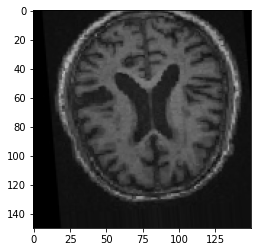

In [30]:
plt.imshow(imgs[0][0,:,:,:])

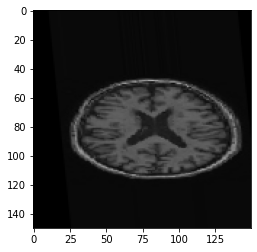

In [31]:
plt.imshow(imgs[0][1,:,:,:])

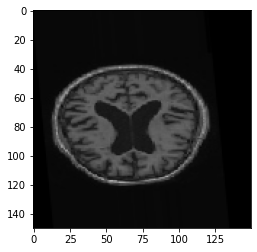

In [32]:
plt.imshow(imgs[0][4,:,:,:])

In [33]:
test_datagen = ImageDataGenerator(rescale=1./255)
#테스트 데이터는 normalize만 해줌.. 

In [35]:
test_generator = test_datagen.flow_from_directory(
    '/content/mydrive/MyDrive/colab/deeplearning/brainimages/brainimages/test',
    target_size=(150,150),
    batch_size=5,
    class_mode='binary'
)
# 테스트 폴더에서 가져옴..

Found 120 images belonging to 2 classes.


In [36]:
model = Sequential() # 하나의 입력 텐서와 하나의 출력 텐서가 있는 일반 레이어 스택에 적합  (데이터의 배열)
model.add(Conv2D(32, (3,3), input_shape=(150,150,3)))
# 컨볼루션 레이어 - 필터로 특징을 뽑아줌
# Conv2D(컨볼루션필터의 수 (컨볼루션 커널의 행,열),샘플수를 제외한 입력형태를 정의(행,열,채널수))
model.add(Activation('relu'))
# 활성함수종류 
model.add(MaxPooling2D(pool_size=(2,2)))
# 풀링은 사이즈를 줄여주는것 
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3))) #필터 64개 사용
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
 
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5)) #한번학습할때마다 랜덤하게 노드 50퍼를 꺼버림 
model.add(Dense(2)) #normal,abnormal
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

In [ ]:
# y(label) : binary
# abnormal, normal : 0, 1

# y(label) : one_hot
# normal : [1, 0]
# abnormal : [0, 1]

# y(label) : 0, 1, 2, 3 ... => 'sparse_categorical_crossentropy'

In [37]:
adam = optimizers.Adam(learning_rate=0.0002)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [38]:
# fit_generator => fit

hist = model.fit(
    train_generator,
    # steps_per_epochs=100,
    epochs=50,
    validation_data = test_generator, #데이터를 갖고와서 validation데이터를 테스트할건데 
    validation_steps=20 # 한번 가져올때마다 이미지를 20개씩 생성(원본데이터로 몇개의 변형된 이미지를 생성할지)
)

Epoch 1/50
 1/32 [..............................] - ETA: 1:11 - loss: 0.6287 - accuracy: 0.8000

KeyboardInterrupt: ignored

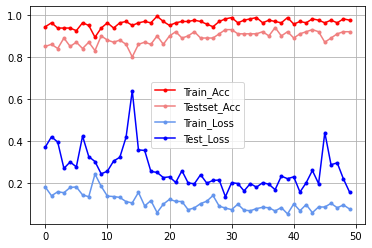

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

x_len = np.arange(len(loss))
plt.plot(x_len, acc, marker='.', c='red', label='Train_Acc')
plt.plot(x_len, val_acc, marker='.', c='lightcoral', label='Testset_Acc')
plt.plot(x_len, loss, marker='.', c='cornflowerblue', label='Train_Loss')
plt.plot(x_len, val_loss, marker='.', c='blue', label='Test_Loss')

plt.legend()
plt.grid()
plt.show()

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))
# dense위로 특징추출부분, 밑으로 예측부분 
# includetop 예측부분포함하냐안하냐 예측부분포함x

transfer_model.trainable=False
# 위에서 이미 학습했으니 학습을 하지않겠다.
transfer_model.summary()

In [ ]:
finetune_model = Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64, activation='relu'))
finetune_model.add(Dense(32, activation='relu'))
finetune_model.add(Dense(2, activation='softmax'))
finetune_model.summary()

In [ ]:
# sparse_categorical_crossentropy : 0,1,2,3...
# categorical_crossentropy : one-hot
finetune_model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
hist = finetune_model.fit(
    train_generator,
    epochs = 50,
    validation_data=test_generator,
    validation_steps=4
)

Epoch 1/50
32/32 [==============================] - 37s 1s/step - loss: 0.7491 - accuracy: 0.5688 - val_loss: 0.5818 - val_accuracy: 0.7500
Epoch 2/50
32/32 [==============================] - 36s 1s/step - loss: 0.6160 - accuracy: 0.6625 - val_loss: 0.5461 - val_accuracy: 0.8000
Epoch 3/50
32/32 [==============================] - 36s 1s/step - loss: 0.5065 - accuracy: 0.8125 - val_loss: 0.5901 - val_accuracy: 0.5500
Epoch 4/50
32/32 [==============================] - 36s 1s/step - loss: 0.4365 - accuracy: 0.8500 - val_loss: 0.4179 - val_accuracy: 0.8000
Epoch 5/50
32/32 [==============================] - 36s 1s/step - loss: 0.3815 - accuracy: 0.8250 - val_loss: 0.3853 - val_accuracy: 0.7500
Epoch 6/50
32/32 [==============================] - 36s 1s/step - loss: 0.3320 - accuracy: 0.9125 - val_loss: 0.2849 - val_accuracy: 0.8500
Epoch 7/50
32/32 [==============================] - 36s 1s/step - loss: 0.3379 - accuracy: 0.8750 - val_loss: 0.2362 - val_accuracy: 1.0000
Epoch 8/50
32/32 [==